In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Analisis de los tiempos

### Carga de tabla

In [5]:
calls = pd.read_csv('Call_Center_1999.csv',delimiter = ';',encoding = "utf-8")
calls

C:\Users\Carolina\AppData\Local\Temp\ipykernel_14448\3024591881.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  calls = pd.read_csv('Call_Center_1999.csv',delimiter = ';',encoding = "utf-8")


,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


In [ ]:
calls.describe()

In [7]:
calls['tiempo_cola']=calls['q_time']/60
calls['tiempo_vru']=calls['vru_time']/60
calls['tiempo_ser']=calls['ser_time']/60

### Analisis q_time

In [8]:
#Info estadistica de q_time
calls['tiempo_cola'].describe()

count    444448.000000
mean          0.983405
std           1.991172
min           0.000000
25%           0.000000
50%           0.266667
75%           1.316667
max         478.216667
Name: tiempo_cola, dtype: float64

Text(0.5, 1.0, 'Tiempo en cola')

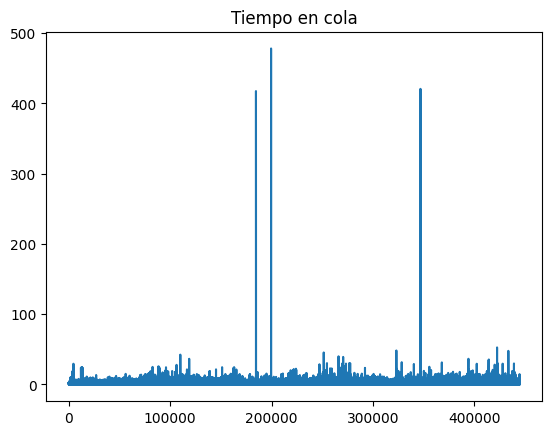

In [23]:
#Grafica de todos los datos
plt.plot(calls['tiempo_cola']) #define bins para graficar
plt.title('Tiempo en cola')

#### Boxplot

In [34]:
#Calculo de bigotes
Q3 = float(calls['tiempo_cola'].quantile(0.75))
Q1 = float(calls['tiempo_cola'].quantile(0.25))
RIC = Q3 - Q1

Min_q = Q1 - 1.5*RIC
if Min_q < min(calls['tiempo_cola']):
    Min_q = min(calls['tiempo_cola'])
Max_q = Q3 + 1.5*RIC
if Max_q > max(calls['tiempo_cola']):
    Max_q = max(calls['tiempo_cola'])

Min_q, Max_q

(0.0, 3.291666666666667)

(0.0, 55.0)

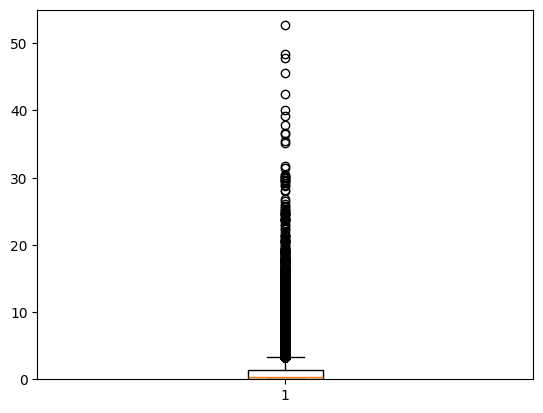

In [11]:
#Box plot sin los 3 Outliers principales (call_ id 20582 = 417.567, 5620 = 478.217, 28834 = 420.75)
plt.boxplot(calls['tiempo_cola'])
plt.ylim(0,55)

(0.0, 3.620833333333334)

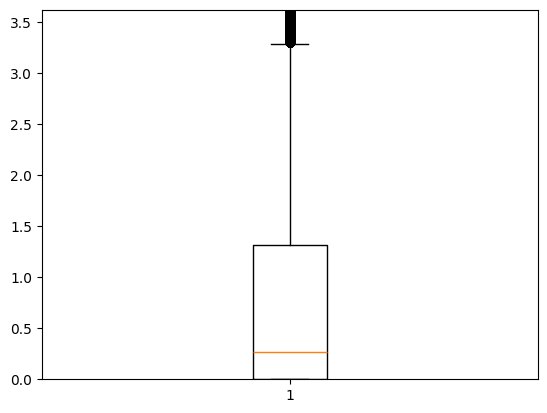

In [60]:
#Box plot enfocado en el box
b = plt.boxplot(calls['tiempo_cola'])
plt.ylim(Min_q*0.9,Max_q*1.1)

#### Histograma

(0.0, 3.620833333333334)

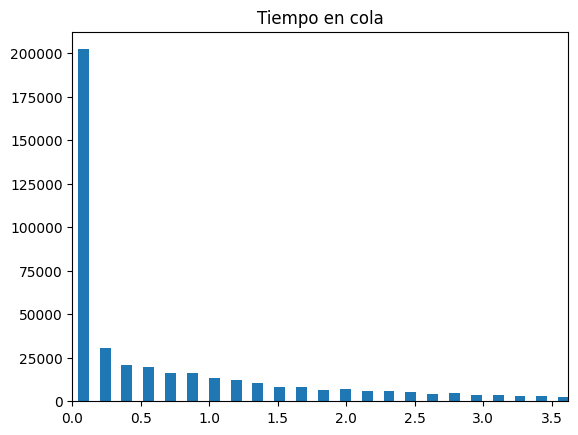

In [61]:
#Histograma sin outliers
plt.hist(calls['tiempo_cola'], bins=3000,rwidth=0.5)
plt.title('Tiempo en cola')
plt.xlim(Min_q*0.9,Max_q*1.1)

### Analisis ser_time

In [36]:
#Info estadistica de ser_time
calls['tiempo_ser'].describe()

count    444448.000000
mean          2.542696
std           4.706213
min           0.000000
25%           0.200000
50%           1.400000
75%           3.083333
max        1023.950000
Name: tiempo_ser, dtype: float64

Text(0.5, 1.0, 'Tiempo en servicio')

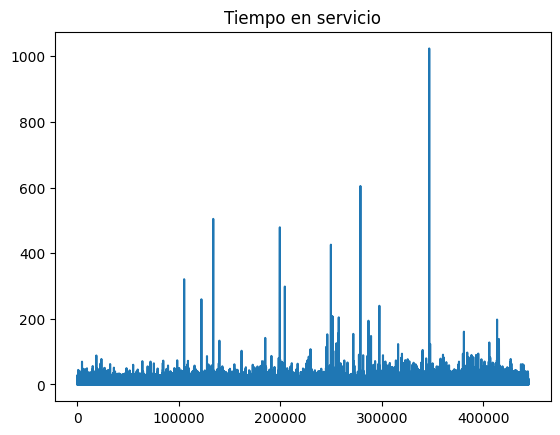

In [41]:
#Grafica de todos los datos
plt.plot(calls['tiempo_ser'])
plt.title('Tiempo en servicio')

#### Boxplot

In [35]:
#Calculo de bigotes
Q3 = float(calls['tiempo_ser'].quantile(0.75))
Q1 = float(calls['tiempo_ser'].quantile(0.25))
RIC = Q3 - Q1

Min_ser = Q1 - 1.5*RIC
if Min_ser < min(calls['tiempo_ser']):
    Min_ser = min(calls['tiempo_ser'])
Max_ser = Q3 + 1.5*RIC
if Max_ser > max(calls['tiempo_ser']):
    Max_ser = max(calls['tiempo_ser'])

Min_ser, Max_ser

(0.0, 7.408333333333333)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad5ea18410>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad5ea740b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad5ea18140>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad5ea749e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad5ea75880>],
 'means': []}

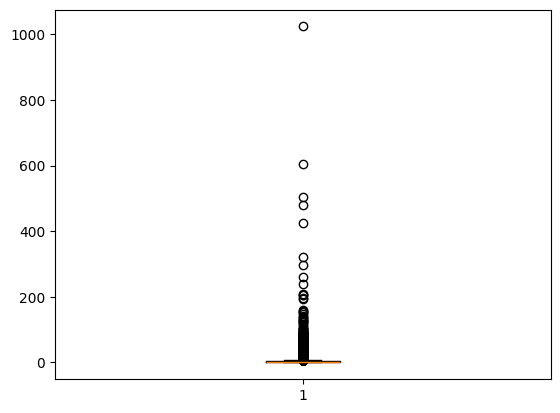

In [37]:
#Box plot completo
plt.boxplot(calls['tiempo_ser'])

(0.0, 8.149166666666668)

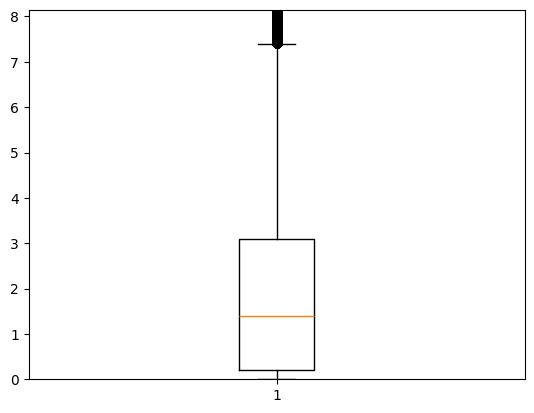

In [62]:
#Box plot enfocado en el box
plt.boxplot(calls['tiempo_ser'])
plt.ylim(Min_ser*0.9,Max_ser*1.1)

#### Histograma

(0.0, 8.149166666666668)

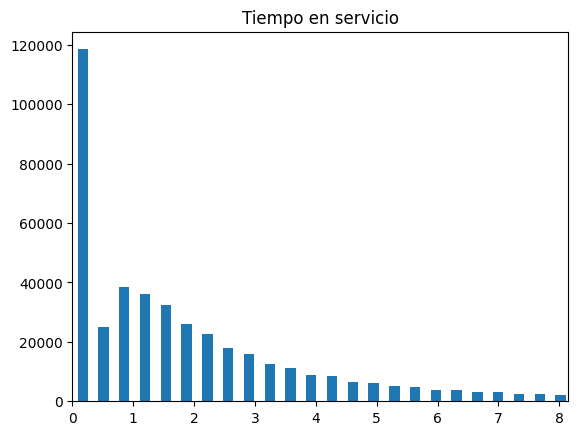

In [63]:
#Histograma sin outliers
plt.hist(list(calls['tiempo_ser']), bins=3000,rwidth=0.5)
plt.title('Tiempo en servicio')
plt.xlim(Min_ser*0.9,Max_ser*1.1)

### Analisis vru_time

In [47]:
#Info estadistica de vru_time
calls['tiempo_vru'].describe()

count    444448.000000
mean          0.171435
std           0.582369
min          -6.033333
25%           0.100000
50%           0.133333
75%           0.166667
max          80.533333
Name: tiempo_vru, dtype: float64

Text(0.5, 1.0, 'Tiempo en vru')

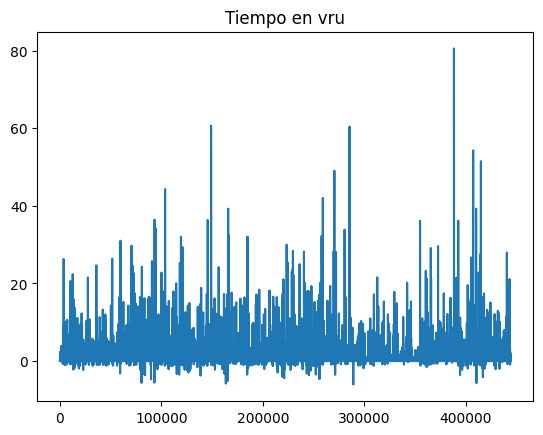

In [48]:
#Grafica de todos los datos
plt.plot(calls['tiempo_vru'])
plt.title('Tiempo en vru')

#### Boxplot

In [50]:
#Calculo de bigotes
Q3 = float(calls['tiempo_vru'].quantile(0.75))
Q1 = float(calls['tiempo_vru'].quantile(0.25))
RIC = Q3 - Q1

Min_vru = Q1 - 1.5*RIC
if Min_vru < min(calls['tiempo_vru']):
    Min_vru = min(calls['tiempo_vru'])
Max_vru = Q3 + 1.5*RIC
if Max_vru > max(calls['tiempo_vru']):
    Max_vru = max(calls['tiempo_vru'])

Min_vru, Max_vru

(2.7755575615628914e-17, 0.2666666666666666)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad82fceba0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad82fcf2c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad82fcc230>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad82fcc980>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad82fcd6a0>],
 'means': []}

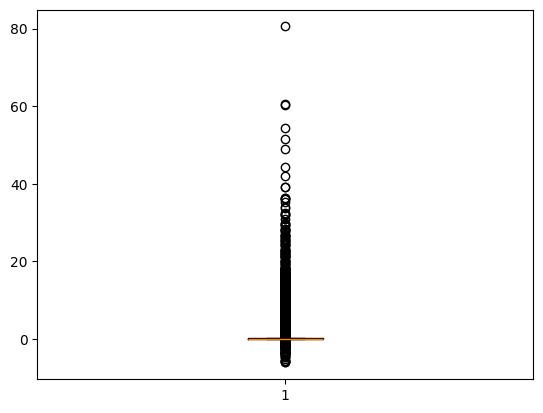

In [53]:
#Box plot completo
plt.boxplot(calls['tiempo_vru'])

(2.4980018054066023e-17, 0.2933333333333333)

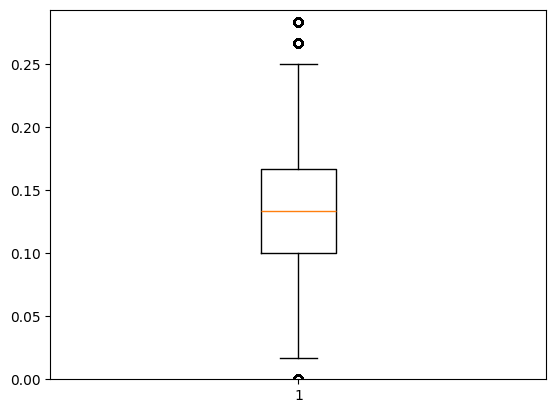

In [59]:
#Box plot enfocado en el box
b = plt.boxplot(calls['tiempo_vru'])
plt.ylim(Min_vru*0.9,Max_vru*1.1)

#### Histograma

(2.4980018054066023e-17, 0.2933333333333333)

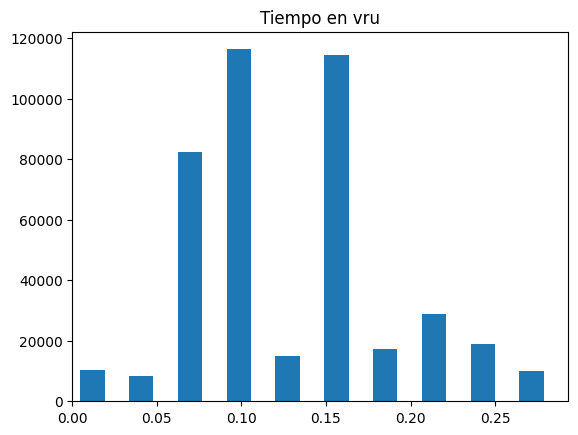

In [64]:
#Histograma sin outliers
plt.hist(list(calls['tiempo_vru']), bins=3000,rwidth=0.5)
plt.title('Tiempo en vru')
plt.xlim(Min_vru*0.9,Max_vru*1.1)